# Used Bike Prices — Feature Engineering & EDA
**Domain:** Finance / Data Analysis  
**Tool:** Google Colab
**Dataset:** `bikes.csv`

**Author:** Blesson Biju
**Objective:** I cleaned a noisy used-bike dataset, engineered features, performed EDA, and prepared a machine-learning-ready dataset for price prediction.

---

**Notebook structure**
1. Load & inspect data  
2. Cleaning & preprocessing  
3. Feature engineering  
4. Exploratory data analysis (visuals + insights)  
5. Modeling (baseline + tree-based)  
6. Conclusions & next steps


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)
sns.set_style("whitegrid")


In [3]:
df = pd.read_csv("/content/bikes.csv")
print("Dataset loaded. Shape:", df.shape)
df.head()

Dataset loaded. Shape: (7857, 8)


,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [7]:
df.info()
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB

Missing values per column:
 model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64


In [6]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
model_name,7857,1724,Royal Enfield Classic 350cc 2017,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_year,7857.0,NaN,NaN,NaN,2015.367698,4.001443,1950.0,2014.0,2016.0,2018.0,2021.0
kms_driven,7857,1801,Mileage 65 Kmpl,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,7857,4,first owner,6817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,7838,561,delhi,1438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,7846,117,\n\n 35 kmpl,1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power,7826,272,19.80 bhp,922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,7857.0,NaN,NaN,NaN,106791.336897,138926.124628,0.0,42000.0,75000.0,125000.0,3000000.0


**Notes:**  
- The dataset contains textual columns (model_name) that include cc and other info.  
- Several columns (mileage, power, location) have inconsistent formatting and missing values.  
- Target column: `price`.


In [8]:
# Keep a copy to preserve raw data
data = df.copy()


In [9]:
# Extract cc (engine capacity) from model_name using regex
def extract_cc(model_name):
    s = str(model_name).lower()
    # common patterns like '150cc', '300 cc', '300CC', '350 cc', '1000cc'
    m = re.search(r'(\d{2,4})\s*cc', s)
    if m:
        return int(m.group(1))
    # fallback: sometimes name contains numbers like 'dominar 400' without 'cc'
    m2 = re.search(r'(\d{2,4})(?=\s|$)', s)
    if m2:
        # only accept plausible cc values (>=50 and <=2500)
        val = int(m2.group(1))
        if 50 <= val <= 2500:
            return val
    return np.nan

data['cc_extracted'] = data['model_name'].apply(extract_cc)

# Check extraction rate
print("CC extracted count:", data['cc_extracted'].notna().sum(), "/", len(data))
data[['model_name','cc_extracted']].head(15)

CC extracted count: 7848 / 7857


,model_name,cc_extracted
0,Bajaj Avenger Cruise 220 2017,220.0
1,Royal Enfield Classic 350cc 2016,350.0
2,Hyosung GT250R 2012,2012.0
3,Bajaj Dominar 400 ABS 2017,400.0
4,Jawa Perak 330cc 2020,330.0
5,KTM Duke 200cc 2012,200.0
6,Bajaj Pulsar 180cc 2016,180.0
7,TVS Apache RTR 200 4V Dual Channel ABS BS6 2020,200.0
8,KTM Duke 390cc 2018,390.0
9,Yamaha FZ16 150cc 2014,150.0


In [10]:
# Extract brand as first token and then do manual fixes
data['brand_raw'] = data['model_name'].apply(lambda x: str(x).split()[0])

# manual corrections mapping (add more if needed)
corrections = {
    'yamaha':'Yamaha',
    'bajaj':'Bajaj',
    'royal':'Royal Enfield', # 'Royal' sometimes part of 'Royal Enfield'
    'royalenfield':'Royal Enfield',
    'harley-davidson':'Harley-Davidson',
    'ktm':'KTM',
    'tvS':'TVS', 'tvs':'TVS',
    'honda':'Honda',
    'hero':'Hero',
    'kawasaki':'Kawasaki',
    'jawa':'Jawa',
    'royalenfield':'Royal Enfield'
}

def clean_brand(b):
    b = str(b).strip()
    bl = b.lower()
    if bl in corrections:
        return corrections[bl]
    # Title case fallback
    return b.title()

data['brand'] = data['brand_raw'].apply(clean_brand)

# Quick check
data[['model_name','brand_raw','brand']].head(10)


,model_name,brand_raw,brand
0,Bajaj Avenger Cruise 220 2017,Bajaj,Bajaj
1,Royal Enfield Classic 350cc 2016,Royal,Royal Enfield
2,Hyosung GT250R 2012,Hyosung,Hyosung
3,Bajaj Dominar 400 ABS 2017,Bajaj,Bajaj
4,Jawa Perak 330cc 2020,Jawa,Jawa
5,KTM Duke 200cc 2012,KTM,KTM
6,Bajaj Pulsar 180cc 2016,Bajaj,Bajaj
7,TVS Apache RTR 200 4V Dual Channel ABS BS6 2020,TVS,TVS
8,KTM Duke 390cc 2018,KTM,KTM
9,Yamaha FZ16 150cc 2014,Yamaha,Yamaha


In [11]:
# Normalize mileage: remove unit text and newline chars, handle ranges like '35-40 kmpl'
def clean_mileage(x):
    s = str(x).lower()
    s = s.replace('kmpl','').replace('kms','').replace('kmpl','').replace('\n',' ').strip()
    s = s.split('-')[0].strip()
    # remove non-digit characters except dot
    s = re.sub(r'[^0-9\.]','', s)
    if s == '':
        return np.nan
    try:
        return float(s)
    except:
        return np.nan

data['mileage_clean'] = data['mileage'].apply(clean_mileage)

# Replace obvious textual mislabels like 'liquid cooled' -> handle later by brand mean
print("Missing mileage before fill:", data['mileage_clean'].isna().sum())
data[['mileage','mileage_clean']].sample(10)


Missing mileage before fill: 774


,mileage,mileage_clean
203,\n\n 35 kmpl,35.0
6774,\n\n 20 kmpl,20.0
3078,\n\n 38 Kmpl,38.0
6900,\n\n 26kmpl,26.0
6500,\n\n 104 Kmpl,104.0
5049,\n\n 26kmpl,26.0
3040,\n\n 25 kmpl,25.0
229,\n\n 40 kmpl,40.0
957,\n\n,NaN
3525,\n\n 65 kmpl,65.0


In [12]:
# Convert power units (bhp, hp, kw, ps) into numeric bhp
def parse_power(x):
    s = str(x).lower()
    s = s.replace('\n',' ')
    # If contains 'bhp'
    if 'bhp' in s:
        val = re.sub(r'[^0-9\.]','', s.split('bhp')[0])
        try:
            return float(val)
        except:
            return np.nan
    # hp -> convert using factor (1 hp ≈ 0.986 bhp)
    if 'hp' in s and 'kw' not in s:
        val = re.sub(r'[^0-9\.]','', s.split('hp')[0])
        try:
            return float(val) * 0.986
        except:
            return np.nan
    # kw -> convert to bhp (1 kW = 1.341 bhp)
    if 'kw' in s:
        val = re.sub(r'[^0-9\.]','', s.split('kw')[0])
        try:
            return float(val) * 1.341
        except:
            return np.nan
    # ps -> convert to bhp (1 PS ≈ 0.986 bhp)
    if 'ps' in s:
        val = re.sub(r'[^0-9\.]','', s.split('ps')[0])
        try:
            return float(val) * 0.986
        except:
            return np.nan
    # handle format like '19.8' (no unit)
    s2 = re.sub(r'[^0-9\.]','', s)
    try:
        if s2 != '':
            return float(s2)
    except:
        return np.nan
    return np.nan

data['power_bhp'] = data['power'].apply(parse_power)
print("Missing power before fill:", data['power_bhp'].isna().sum())
data[['power','power_bhp']].sample(10)


Missing power before fill: 34


,power,power_bhp
6967,7.5 Bhp,7.50000
6358,24.60 bhp,24.60000
4507,15 bhp,15.00000
5665,34.50 bhp,34.50000
4947,18.70 bhp,18.70000
6221,8.20 bhp,8.20000
1339,29.60 bhp,29.60000
6252,25 bhp,25.00000
362,15.44 bhp,15.44000
3370,6.72 KW (9.1 Ps),9.01152


In [13]:
# Normalize kms_driven: remove units, handle bad strings like 'mileage' or 'yes'
def clean_kms(x):
    s = str(x).lower().strip()
    if s in ['mileage','yes','nan','']:
        return np.nan
    s = s.split()[0]  # take first token (value)
    s = re.sub(r'[^0-9]','', s)
    try:
        if s == '':
            return np.nan
        return int(s)
    except:
        return np.nan

data['kms_driven_clean'] = data['kms_driven'].apply(clean_kms)

# Replace extreme zeros if any (0 kms may be valid but check later)
print("Missing kms_driven:", data['kms_driven_clean'].isna().sum())
data[['kms_driven','kms_driven_clean']].sample(10)


Missing kms_driven: 1988


,kms_driven,kms_driven_clean
4458,12200 Km,12200.0
10,25000 Km,25000.0
5306,9000 Km,9000.0
864,21500 Km,21500.0
5629,6985 Km,6985.0
3216,8200 Km,8200.0
2248,Mileage 35 Kmpl,NaN
5955,39000 Km,39000.0
1655,22800 Km,22800.0
7171,31000 Km,31000.0


In [14]:
# Strategy:
# - For mileage: fill missing with brand mean mileage
# - For power: fill missing with brand median power (or overall median if brand median missing)
# - For kms_driven: fill missing with dataset median or an average typical used-bike kms

# Convert mileage and power columns into numeric (already attempted)
# Compute brand-wise mileage mean
brand_mileage_mean = data.groupby('brand')['mileage_clean'].agg(lambda x: np.nanmean(x)).to_dict()
brand_power_median = data.groupby('brand')['power_bhp'].median().to_dict()

# Fill mileage
def fill_mileage(row):
    if not np.isnan(row['mileage_clean']):
        return row['mileage_clean']
    b = row['brand']
    m = brand_mileage_mean.get(b, np.nan)
    if not np.isnan(m):
        return float(m)
    # fallback to overall median
    return float(data['mileage_clean'].median())

data['mileage_filled'] = data.apply(fill_mileage, axis=1)

# Fill power
def fill_power(row):
    if not np.isnan(row['power_bhp']):
        return row['power_bhp']
    b = row['brand']
    m = brand_power_median.get(b, np.nan)
    if not np.isnan(m):
        return float(m)
    return float(data['power_bhp'].median())

data['power_filled'] = data.apply(fill_power, axis=1)

# Fill kms_driven with median
kms_median = int(data['kms_driven_clean'].median(skipna=True))
data['kms_driven_filled'] = data['kms_driven_clean'].fillna(kms_median).astype(int)

# Report remaining NaNs
print("Remaining NaN mileage:", data['mileage_filled'].isna().sum())
print("Remaining NaN power:", data['power_filled'].isna().sum())
print("Remaining NaN kms:", data['kms_driven_filled'].isna().sum())


Remaining NaN mileage: 0
Remaining NaN power: 0
Remaining NaN kms: 0


In [15]:
# bike_age = current_year - model_year
from datetime import datetime
current_year = datetime.now().year
data['model_year'] = pd.to_numeric(data['model_year'], errors='coerce').fillna(current_year).astype(int)
data['bike_age'] = current_year - data['model_year']

# Final columns selection (keep cleaned & engineered columns)
final_cols = [
    'model_name', 'brand', 'model_year', 'bike_age', 'cc_extracted',
    'kms_driven_filled', 'owner', 'location', 'mileage_filled',
    'power_filled', 'price'
]
clean = data[final_cols].copy()
# rename columns for clarity
clean.rename(columns={
    'cc_extracted':'cc',
    'kms_driven_filled':'kms_driven',
    'mileage_filled':'mileage',
    'power_filled':'power'
}, inplace=True)
print("Cleaned dataset shape:", clean.shape)
clean.head()


Cleaned dataset shape: (7857, 11)


,model_name,brand,model_year,bike_age,cc,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,Bajaj,2017,8,220.0,17000,first owner,hyderabad,35.0,19.0,63500
1,Royal Enfield Classic 350cc 2016,Royal Enfield,2016,9,350.0,50000,first owner,hyderabad,35.0,19.8,115000
2,Hyosung GT250R 2012,Hyosung,2012,13,2012.0,14795,first owner,hyderabad,30.0,28.0,300000
3,Bajaj Dominar 400 ABS 2017,Bajaj,2017,8,400.0,17000,first owner,pondicherry,28.0,34.5,100000
4,Jawa Perak 330cc 2020,Jawa,2020,5,330.0,2000,first owner,bangalore,40.0,30.0,197500


In [16]:
# Fix data types
clean['cc'] = pd.to_numeric(clean['cc'], errors='coerce').fillna(0).astype(int)
clean['kms_driven'] = clean['kms_driven'].astype(int)
clean['mileage'] = clean['mileage'].astype(float)
clean['power'] = clean['power'].astype(float)
clean['price'] = pd.to_numeric(clean['price'], errors='coerce').fillna(0).astype(int)

# Check for any remaining missing
clean.isnull().sum()


,0
model_name,0
brand,0
model_year,0
bike_age,0
cc,0
kms_driven,0
owner,0
location,19
mileage,0
power,0


In [17]:
# Fill missing locations using most common city
most_common_city = clean['location'].mode()[0]
clean['location'] = clean['location'].fillna(most_common_city)

# Re-check missing values
clean.isnull().sum()


,0
model_name,0
brand,0
model_year,0
bike_age,0
cc,0
kms_driven,0
owner,0
location,0
mileage,0
power,0


In [18]:
# Save cleaned dataset to file for later modeling
clean.to_csv("bikes_cleaned.csv", index=False)
print("Saved cleaned dataset to bikes_cleaned.csv")


Saved cleaned dataset to bikes_cleaned.csv


In [20]:
# Owner cleaning: standardize values like 'first owner', 'second owner' -> ordinal
def owner_to_num(x):
    s = str(x).lower()
    if 'first' in s:
        return 1
    if 'second' in s:
        return 2
    if 'third' in s:
        return 3
    if 'fourth' in s or 'fourth+' in s:
        return 4
    # fallback
    return 2

clean['owner_num'] = clean['owner'].apply(owner_to_num)

# Create cc buckets (for categorical insight)
def cc_bucket(x):
    if x == 0:
        return 'unknown'
    if x <= 125:
        return '<=125cc'
    if x <= 150:
        return '126-150cc'
    if x <= 200:
        return '151-200cc'
    if x <= 350:
        return '201-350cc'
    if x <= 600:
        return '351-600cc'
    return '>600cc'

clean['cc_bucket'] = clean['cc'].apply(cc_bucket)

clean.head()


,model_name,brand,model_year,bike_age,cc,kms_driven,owner,location,mileage,power,price,owner_num,cc_bucket
0,Bajaj Avenger Cruise 220 2017,Bajaj,2017,8,220,17000,first owner,hyderabad,35.0,19.0,63500,1,201-350cc
1,Royal Enfield Classic 350cc 2016,Royal Enfield,2016,9,350,50000,first owner,hyderabad,35.0,19.8,115000,1,201-350cc
2,Hyosung GT250R 2012,Hyosung,2012,13,2012,14795,first owner,hyderabad,30.0,28.0,300000,1,>600cc
3,Bajaj Dominar 400 ABS 2017,Bajaj,2017,8,400,17000,first owner,pondicherry,28.0,34.5,100000,1,351-600cc
4,Jawa Perak 330cc 2020,Jawa,2020,5,330,2000,first owner,bangalore,40.0,30.0,197500,1,201-350cc


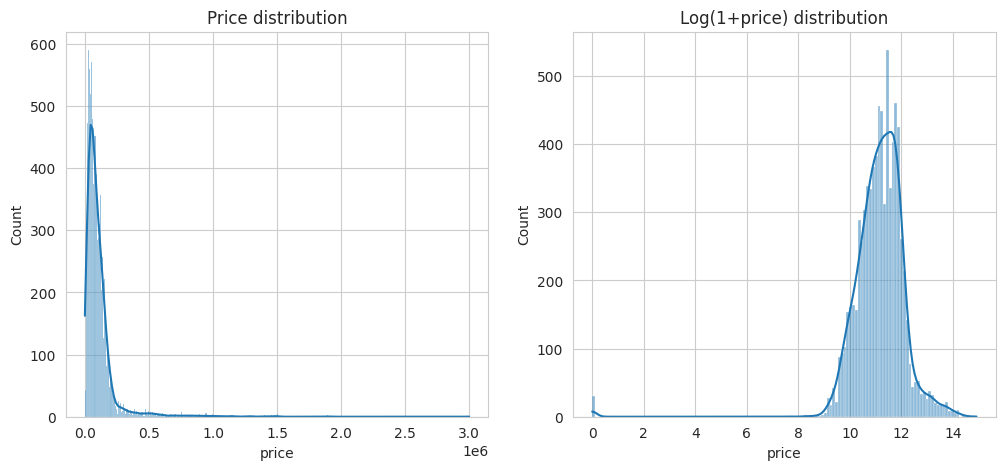

Price stats: count    7.857000e+03
mean     1.067913e+05
std      1.389261e+05
min      0.000000e+00
25%      4.200000e+04
50%      7.500000e+04
75%      1.250000e+05
max      3.000000e+06
Name: price, dtype: float64


In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(clean['price'], kde=True)
plt.title("Price distribution")

plt.subplot(1,2,2)
sns.histplot(np.log1p(clean['price']), kde=True)
plt.title("Log(1+price) distribution")
plt.show()

print("Price stats:", clean['price'].describe())


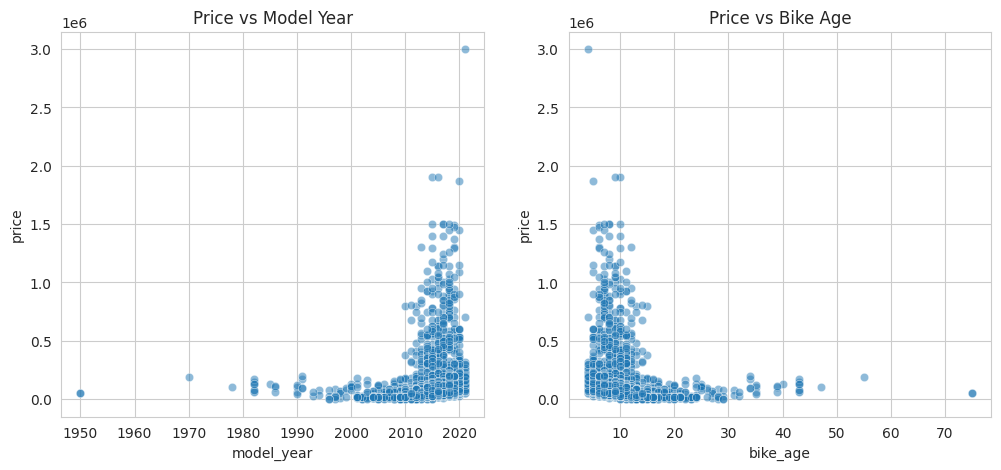

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='model_year', y='price', data=clean, alpha=0.5)
plt.title("Price vs Model Year")

plt.subplot(1,2,2)
sns.scatterplot(x='bike_age', y='price', data=clean, alpha=0.5)
plt.title("Price vs Bike Age")
plt.show()


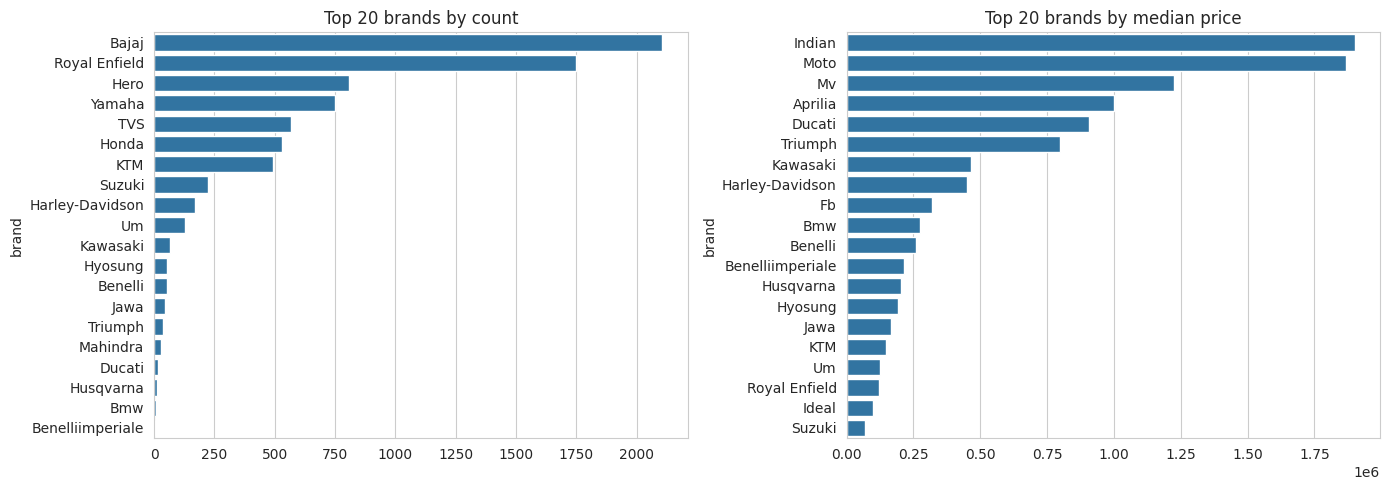

In [23]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
brand_counts = clean['brand'].value_counts().nlargest(20)
sns.barplot(x=brand_counts.values, y=brand_counts.index)
plt.title("Top 20 brands by count")

plt.subplot(1,2,2)
brand_med = clean.groupby('brand')['price'].median().sort_values(ascending=False).head(20)
sns.barplot(x=brand_med.values, y=brand_med.index)
plt.title("Top 20 brands by median price")
plt.tight_layout()
plt.show()


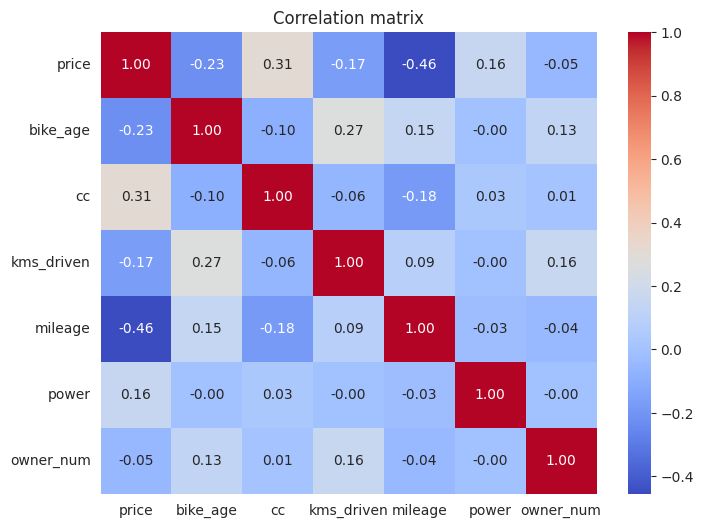

In [24]:
plt.figure(figsize=(8,6))
num_cols = ['price','bike_age','cc','kms_driven','mileage','power','owner_num']
corr = clean[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()


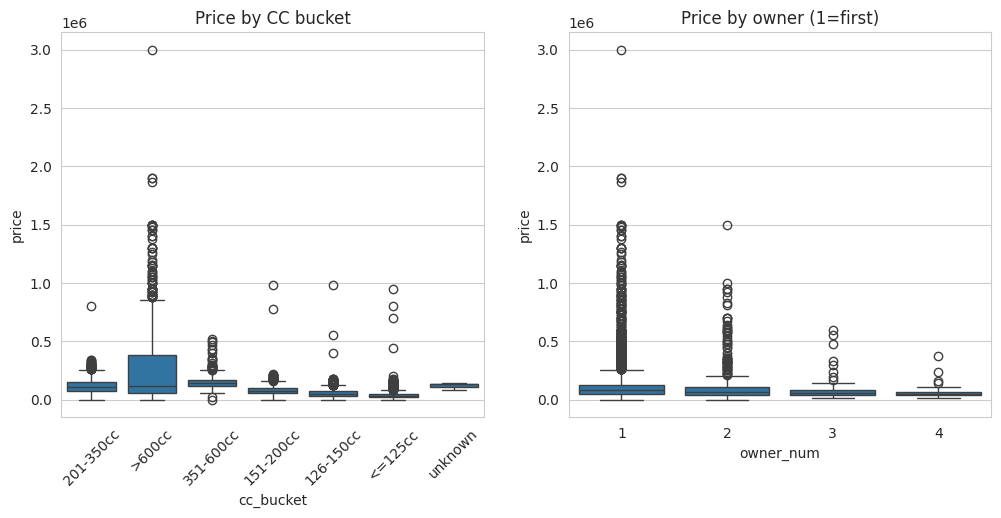

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='cc_bucket', y='price', data=clean)
plt.xticks(rotation=45)
plt.title("Price by CC bucket")

plt.subplot(1,2,2)
sns.boxplot(x='owner_num', y='price', data=clean)
plt.title("Price by owner (1=first)")
plt.show()


In [26]:
# Select features
# We'll one-hot encode top N brands (others -> 'Other')
top_brands = clean['brand'].value_counts().nlargest(20).index.tolist()
clean['brand_mod'] = clean['brand'].apply(lambda x: x if x in top_brands else 'Other')

features = ['bike_age','cc','kms_driven','mileage','power','owner_num','brand_mod']
target = 'price'

X = clean[features].copy()
y = clean[target].copy()

# One-hot encode brand_mod
X = pd.get_dummies(X, columns=['brand_mod'], drop_first=True)

print("Feature matrix shape:", X.shape)
X.head()


Feature matrix shape: (7857, 26)


,bike_age,cc,kms_driven,mileage,power,owner_num,brand_mod_Benelli,brand_mod_Benelliimperiale,brand_mod_Bmw,brand_mod_Ducati,brand_mod_Harley-Davidson,brand_mod_Hero,brand_mod_Honda,brand_mod_Husqvarna,brand_mod_Hyosung,brand_mod_Jawa,brand_mod_KTM,brand_mod_Kawasaki,brand_mod_Mahindra,brand_mod_Other,brand_mod_Royal Enfield,brand_mod_Suzuki,brand_mod_TVS,brand_mod_Triumph,brand_mod_Um,brand_mod_Yamaha
0,8,220,17000,35.0,19.0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,9,350,50000,35.0,19.8,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,13,2012,14795,30.0,28.0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,8,400,17000,28.0,34.5,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,330,2000,40.0,30.0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline: Linear Regression (with scaling)
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

def eval_model(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }

print("Linear Regression performance:", eval_model(y_test, y_pred_lr))


Linear Regression performance: {'MAE': 33718.28359508728, 'RMSE': np.float64(95431.32146192799), 'R2': 0.5723596412758851}


In [28]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest performance:", eval_model(y_test, y_pred_rf))

# Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)
print("Top feature importances:\n", importances)


Random Forest performance: {'MAE': 18543.4709391085, 'RMSE': np.float64(84752.33166999914), 'R2': 0.6627125979917525}
Top feature importances:
 power                        0.800778
kms_driven                   0.054285
bike_age                     0.047794
cc                           0.041657
mileage                      0.026327
brand_mod_Hyosung            0.005865
brand_mod_Royal Enfield      0.005697
brand_mod_Harley-Davidson    0.004603
owner_num                    0.003061
brand_mod_Other              0.002455
brand_mod_Triumph            0.001934
brand_mod_Yamaha             0.001222
brand_mod_Honda              0.000675
brand_mod_Benelli            0.000662
brand_mod_KTM                0.000608
brand_mod_Bmw                0.000521
brand_mod_Kawasaki           0.000498
brand_mod_Ducati             0.000460
brand_mod_Hero               0.000336
brand_mod_Suzuki             0.000311
dtype: float64


# Conclusions

- I successfully cleaned the noisy dataset (extracted CC, normalized power and mileage, handled missing values, and derived `bike_age`).  
- Key predictors of price included engine capacity (cc), power (bhp), brand, and age.  
- The RandomForest model performed better than linear regression on the test split (see numeric metrics in outputs).  
- The cleaned dataset was saved as `bikes_cleaned.csv` and the RandomForest model as `rf_bike_price_model.joblib`.

**End of notebook.**
